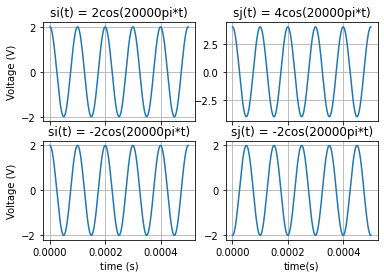

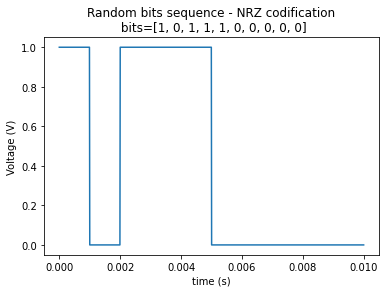

Text(0.5, 1.0, 's(t)')

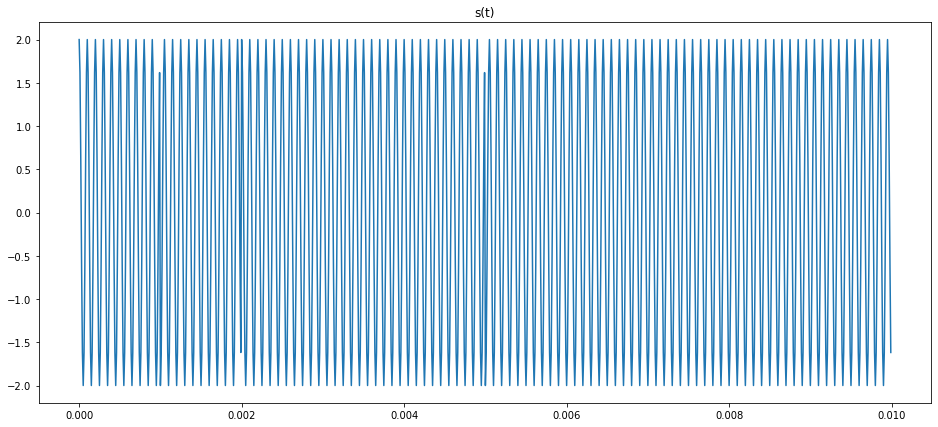

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random


def fUNRZ(bits, T_s, V_max, Fs):
  ##dsddsd
  num_amostras_por_bit = int(Fs*T_s)
  t = np.linspace(0, T_s*len(bits),num_amostras_por_bit*len(bits))
  A = V_max   #amplitude do pulso
  UNRZ = np.array([])
  for i in bits:
    if i == 1:
      UNRZ = np.append(UNRZ, A * np.ones(num_amostras_por_bit))
    elif i == 0:
      UNRZ = np.append(UNRZ, np.zeros(num_amostras_por_bit))
  return UNRZ,t






fc = 10000
#omega = 2*np.pi*fc
T = 1/fc
t = np.linspace(0, 5*T, 1000)
Psi1 = np.sqrt(2/T)*np.cos(2*np.pi*fc*t)
Psi2 = np.sqrt(2/T)*np.sin(2*np.pi*fc*t)

ai1a = 2*np.sqrt(T/2)
aj1b = 4*np.sqrt(T/2)
ai1c = 2*np.sqrt(T/2)
aj1d = -2*np.sqrt(T/2)

s1i = ai1a*Psi1
s1j = aj1b*Psi1
s2i = ai1c*Psi1
s2j = aj1d*Psi1

fig, ax = plt.subplots(2, 2, sharex=True)
ax[0, 0].plot(t, s1i)
ax[0, 0].set_title("si(t) = 2cos(20000pi*t)")
ax[0, 0].set_ylabel("Voltage (V)")
ax[0, 0].grid()
ax[0, 1].plot(t, s1j)
ax[0, 1].set_title("sj(t) = 4cos(20000pi*t)")
ax[0, 1].grid()
ax[1, 0].plot(t, s2i)
ax[1, 0].set_title("si(t) = -2cos(20000pi*t)")
ax[1, 0].set_ylabel("Voltage (V)")
ax[1, 0].set_xlabel("time (s)")
ax[1, 0].grid()
ax[1, 1].plot(t, s2j)
ax[1, 1].set_title("sj(t) = -2cos(20000pi*t)")
ax[1, 1].set_xlabel("time(s)")
ax[1, 1].grid()
plt.show()


# bit size
fs = 100e3  #frequencia do sinal amostragem
T_s = 1e-3 # intervalo de bit (periodo por bit)
# bits
total_bits_dado = 10
bits = []
for i in range(total_bits_dado):
  bits.append(random.getrandbits(1))
coded_bits,time = fUNRZ(bits,T_s=T_s,V_max=1,Fs=fs)

plt.plot(time,coded_bits)
plt.xlabel("time (s)")
plt.ylabel("Voltage (V)")
title = "Random bits sequence - NRZ codification\n bits={}".format(bits)
plt.title(title)
plt.show()



# Portadora
x = 0
step = 1 / fs
t=np.arange(0,T_s,step)
portadora = np.cos(2 * np.pi * fc * t)   #Psi1

#Modulando
A = -2  #amplitude do bit 1
B = 2  #amplitude do bit 0
s = []
Amp=1
bit_size = int(fs * T_s)
#Sinal Modulado
for i in range(0, len(coded_bits), bit_size):
  sA = -1*portadora * coded_bits[i : i + bit_size] * A
  sB = portadora * (coded_bits[i : i + bit_size] - Amp) * B
  s.extend(sA + sB)

# Visualização dos sinais
tempo=np.arange(0,len(s))  
tempo=tempo*1/fs
plt.figure(figsize=(16,7))
plt.plot(tempo,s)
plt.title("s(t)")
